# Exercício 2 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9541630148887634, 4.006749398026824e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SecondMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0 -0.269118 -0.858271 -2.186817
1 -1.772794  1.377290 -4.480604
2  2.789870  1.677561  0.328043
3 -0.031164 -2.212707  4.467393
4  2.257872 -2.854968  2.076838


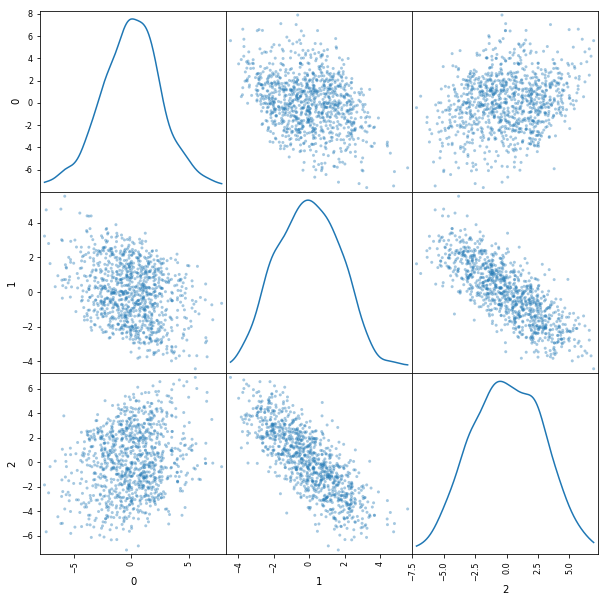

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,-0.0829,0.0327,0.998,0.29041
1,-0.1362,0.0458,0.9939,0.00042956
2,-0.166,0.0677,0.9938,0.00037468


## NPCA-RLS Algorithm

In [21]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 100)

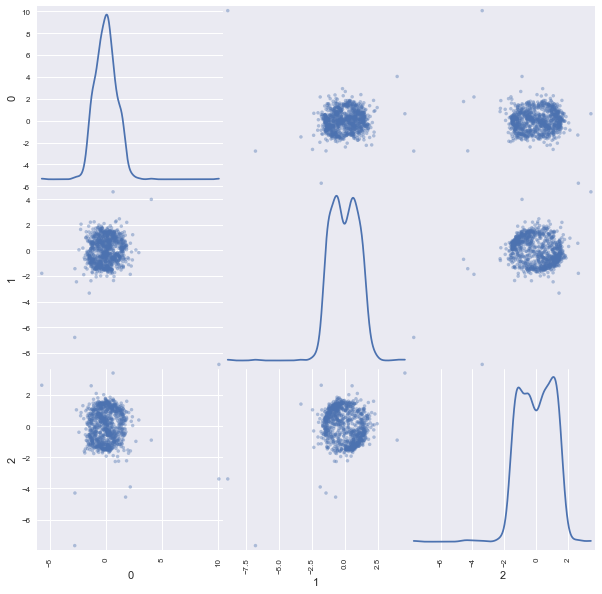

In [22]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,1.0024,1.0235,0.9405,1.3756e-19
1,0.7252,0.9274,0.9419,2.4076e-19
2,0.6138,1.2424,0.947,1.7968e-18


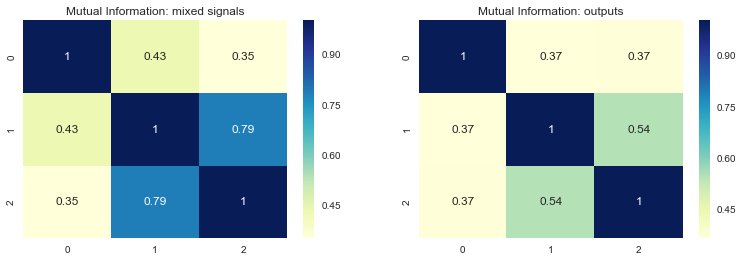

In [23]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [24]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 100) 

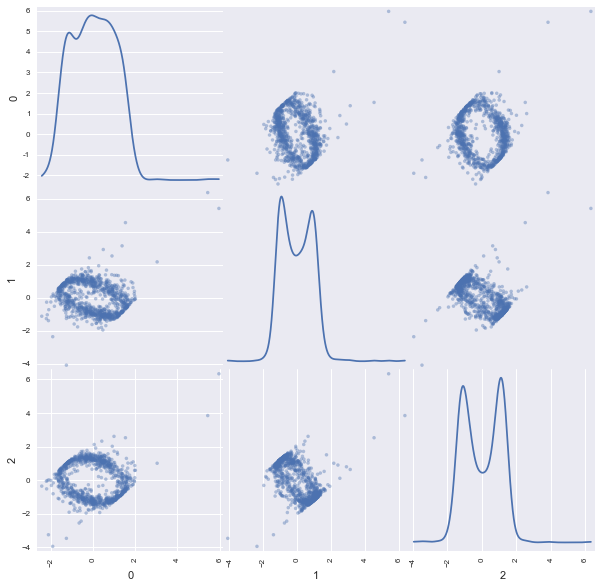

In [25]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3217,15.7776,0.9663,1.8586e-14
1,0.654,0.6301,0.9323,7.2699e-21
2,0.4912,0.9973,0.9232,3.6051e-22


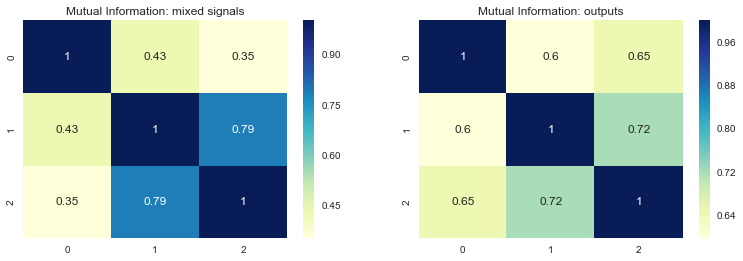

In [26]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [27]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, runs = 100)

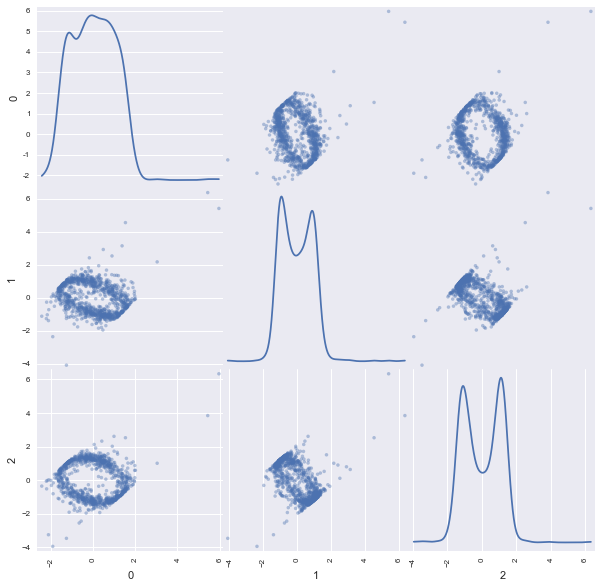

In [28]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.4011,0.9936,0.9663,1.8698e-14
1,0.7417,0.6535,0.9323,7.3298e-21
2,0.6654,0.3913,0.9231,3.5824e-22


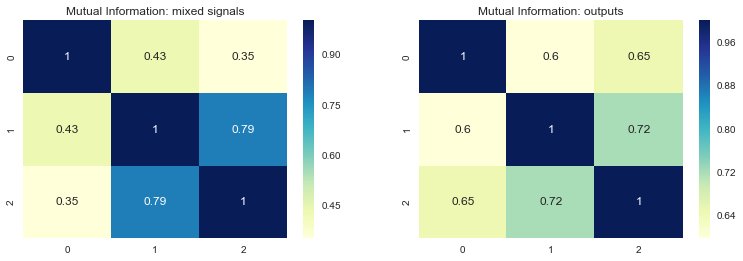

In [29]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)